# 1. Theoretical Framework

## Introduction

**Pokémon** is a long-running multimedia franchise developed by Game Freak and published by Nintendo, centered around capturing, training, and battling fictional creatures called Pokémon. While the franchise began with turn-based RPGs, it has evolved into a global phenomenon encompassing video games, trading cards, television shows, and competitive gaming communities. Within the games themselves, players take on the role of Pokémon Trainers, building teams of creatures with unique abilities, statistics, and move sets in order to battle other trainers.

In the competitive scene, particularly through platforms such as [Pokémon Showdown](https://pokemonshowdown.com/), battles are conducted using meticulously balanced rulesets curated by the community (notably Smogon University). Players construct teams of six Pokémon chosen from a pool of hundreds, each with distinct roles, strategies, and limitations. Due to this variety, the competitive metagame is both dynamic and complex, requiring players to adapt to frequent shifts in viability and usage.

Despite this complexity, there is currently no single metric that objectively quantifies a Pokémon’s overall viability within a tier. Viability is influenced not only by raw strength but also by factors such as usage trends, versatility, and synergy with other team members. This project proposes a **Meta Viability Index (MVI)**, a composite indicator designed to capture these multidimensional aspects and produce a single score representing a Pokémon’s competitive relevance in a specific tier. This Jupyter Notebook file contains a brief rundown of each section, alongside the accompanying code. A word document will be included to fully delve into aspects of the project that may need more explanation. 

---

## Justification for the Index

Competitive viability in Pokémon is a multidimensional concept. It cannot be fully captured by a single attribute like base stats or usage percentage. Instead, a Pokémon’s effectiveness in the metagame is shaped by its consistency, versatility, and how well it synergizes with common team structures. These aspects, though individually measurable, are rarely combined into a single interpretable metric.

Currently, the competitive community, particularly Smogon University, uses tier systems based on both usage statistics and expert discussions to group Pokémon. While effective in practice, these tier lists do not provide a scoring mechanism for comparing Pokémon within a tier or understanding the marginal differences between them. As a result, players often rely on subjective opinions when evaluating Pokémon for their teams.

Composite indicators are not new to games. In football video games like *FIFA*, players are scored using overall ratings that aggregate multiple statistics such as speed, stamina, passing, and shooting. Similarly, MOBA titles like League of Legends use matchmaking rating (MMR) and champion win rates as blended indicators to estimate performance and balance. These systems combine variables into a single numerical value to inform gameplay decisions, matchmaking, and tier lists.

This project follows a similar philosophy by introducing a composite indicator to competitive Pokémon. The proposed **Meta Viability Index (MVI)** integrates usage statistics, performance trends, and role flexibility into a unified score. This approach allows for transparent, data-driven comparison of Pokémon and helps capture the complexity of competitive viability in a structured and objective way.

---

## Data Source

The primary data used in this index comes from [Smogon.com](https://www.smogon.com/stats/), which publishes monthly statistics from Pokémon Showdown, an online battle simulator widely used by the competitive community. These statistics are:
- **Large-scale** (millions of battles per month),
- **Current** (updated monthly),
- **Representative** of actual meta usage,
- **Structured** and consistent for processing.

A full list of all Pokémon was sourced from [Pokemondb.net](https://pokemondb.net/tools/text-list), in an easy-to-use code friendly format. This was used to gather stat values, which were used in many of the dervied variables.

As expert interviews or official Pokémon Company data are unavailable, these community-driven sources represent the most authoritative and widely accepted datasets available for this kind of analysis.

---

## Defining Meta Viability and Variable Selection Criteria

For the purposes of this project, **meta viability** is defined as a Pokémon’s overall effectiveness, consistency, and strategic value within a competitive tier. It reflects how often a Pokémon is used, how reliably it performs, and how flexibly it fits into a variety of viable team compositions. This concept is inherently multidimensional and must be captured through a combination of different measurable attributes.

To ensure methodological consistency and relevance, the variables selected for the Meta Viability Index (MVI) must meet the following criteria:

- Be **publicly available** and consistently measured across all Pokémon in the dataset.
- Represent **distinct aspects** of competitive performance to avoid redundancy.
- Be **quantifiable** and suitable for standardisation.
- Offer **strategic insight** into how and why a Pokémon is effective in its role(s).

The selected variables will be grouped into three broad categories to support a balanced evaluation:
- **Usage Metrics** (e.g., usage rate, lead frequency)
- **Performance Metrics** (e.g., win rate, success over time)
- **Flexibility Metrics** (e.g., moveset diversity, role variety)

This structure will guide the data selection and analysis process in the sections that follow, supporting the creation of a composite indicator that captures the full competitive profile of each Pokémon.

---

## Relevance to Players and Researchers

This index may prove useful to:
- **Competitive players** aiming to identify meta threats or reliable team staples.
- **Analysts** seeking trends in usage and performance.
- **Developers** and community tiering councils looking for data to support bans or suspect tests.

# 2. Data Selection

## Overview

This section outlines the process of selecting appropriate indicators for the Meta Viability Index (MVI). All variables were chosen based on their relevance to the concept of meta viability and availability from credible data sources. Each variable captures a distinct aspect of a Pokémon’s performance in competitive play, as defined in the previous section.

The focus of this project is strictly on Pokémon within a single tier: **Gen 9 OverUsed (OU)**, to ensure fair comparisons and avoid confounding the analysis with the effects of tier-based filtering. The MVI is designed to rank Pokémon within this tier, based on how viable they are relative to others in the same environment.

---

## Selected Variables and Justification

| **Variable**             | **Category**         | **Description**                                                              | **Rationale** |
|--------------------------|----------------------|------------------------------------------------------------------------------|---------------|
| `Usage Percentage`     | Usage Metric         | The proportion of teams in OU that include the Pokémon                       | Indicates popularity and meta centrality |
| `Raw Count of Battles` | Usage Metric         | Total number of battles featuring the Pokémon                                | Helps validate reliability of the usage % |
| `Lead Usage Percentage`| Usage Metric         | Frequency of use as the first Pokémon in battle                              | Suggests role consistency and strategic fit |
| `Defensive Coverage`    | Typing Metric        | Score based on resistances, immunities, and weaknesses                       | Captures how well a typing holds up against the meta |
| `Offensive Coverage`    | Typing Metric        | Score based on weighted count of super-effective matchups                    | Reflects offensive threat potential and ability to pressure common types |
| `Wallbreaking`         | Stat Combination     | Measures raw power output using Attack, Special Attack, and Speed            | Highlights a Pokémon’s ability to break past defensive cores |
| `Defensive Bulk`       | Stat Combination     | Measures physical and special survivability using HP, Defense, and Sp. Def   | Indicates how well a Pokémon can tank hits or check threats |
| `Speed Control`         | Role Metric          | Measures suitability for fast offense or Trick Room support                  | Represents control over tempo and turn order |
| `Base Stat Total`      | Stat Total           | The sum of all six base stats (HP, Atk, Def, SpA, SpD, Spe)                  | Serves as a high-level proxy for raw stat potential and overall ceiling |

---

## Strengths and Limitations of the Data

**Strengths:**

- Data is sourced from [Smogon.com](https://www.smogon.com/stats/), based on Pokémon Showdown battles, a widely popular, trusted and consistent source.
- Available monthly and by tier, making it easy to isolate Gen 9 OU data.
- Stat-based metrics (Wallbreaking, Bulk, Speed Control, BST) are directly calculated and grounded in objective base stats.
- Coverage metrics use game mechanics to quantify typing advantages and disadvantages against the full type chart.

**Limitations:**

- No direct win/loss data or match outcomes are available.
- Typing-based metrics rely on static type interactions and do not account for move pool limitations or hidden abilities.
- Role-specific performance (e.g. pivoting, hazard control) must be approximated through derived variables like SpeedControl or Lead Usage.

In cases of data scarcity, **proxy variables** were selected to approximate competitive value. For example, **SpeedControl** estimates tempo influence, and **Offensive Coverage** quantifies pressure against high-priority threats.

---

## Summary of Data Characteristics

| **Variable**             | **Source**  | **Availability** | **Type** | **Role**     |
|--------------------------|-------------|------------------|----------|--------------|
| Usage Percentage         | Smogon      | Monthly OU       | Hard     | Output       |
| Raw Count of Battles     | Smogon      | Monthly OU       | Hard     | Input        |
| Lead Usage Percentage    | Smogon      | Monthly OU       | Hard     | Process      |
| Defensive Coverage        | Derived     | Computed         | Soft     | Process      |
| Offensive Coverage        | Derived     | Computed         | Soft     | Input        |
| Wallbreaking             | Derived     | Computed         | Soft     | Input        |
| Defensive Bulk           | Derived     | Computed         | Soft     | Input        |
| Speed Control             | Derived     | Computed         | Soft     | Input        |
| Base Stat Total          | Derived     | Computed         | Hard     | Input        |

These variables form the basis of the MVI and will be normalised, weighted, and aggregated in the following sections.


# 3. Imputation of Missing Data

## Overview

Missing data can result from Pokémon being used too infrequently to be logged in all Smogon statistical categories, or from structural inconsistencies across the data files. Left unaddressed, these gaps may introduce bias or instability into the composite indicator.

The objective of this stage is to ensure that the dataset used for the Meta Viability Index (MVI) is both complete and robust. The imputation strategy includes a combination of filtering and logical defaulting (e.g., setting missing values to 0% where appropriate), as well as removing entries with insufficient information. As Smogon is an extremely reliable source, filtering is the most used method here.

---

## Variable-Specific Handling

### Usage Percentage & Raw Count
All Pokémon in the `usage.txt` file have valid usage statistics, but not all are relevant for inclusion in a competitive analysis. To reduce noise, any Pokémon with a usage percentage below **0.5%** was removed from the dataset. This threshold filters out fringe or gimmick entries and ensures that only Pokémon with meaningful presence in the metagame are included.

### Lead Usage Percentage
Pokémon not used as leads are often excluded from the `leads.txt` file. For any valid Pokémon from the filtered usage data that do not appear in the leads file, a **lead usage percentage of 0.0%** is imputed. This reflects the fact that they are never used in the lead position, rather than being truly “missing” values. Likewise, any Pokémon that were removed from Usage, will be removed from Leads as well.

### Offensive & Defensive Coverage
Coverage variables are calculated using type matchups and are deterministically computable for any valid typing combination. Therefore, no imputation is needed, but validation checks are applied to ensure that types are parsed correctly and present in the type chart.

### Wallbreaking & Defensive Bulk
Wallbreaking and bulk scores are computed from existing base stats (Attack, Sp. Atk, HP, Defense, Sp. Def). These values are deterministic and universally available, so no imputation is required. Pokémon lacking these base stats are excluded.

### Base Stat Total (BST)
BST is calculated as the sum of a Pokémon’s base stats and is available for all included entries. If any base stat is missing, the Pokémon is excluded from the dataset entirely.

---

## Summary of Strategy

- Pokémon below 0.5% usage were excluded.
- Pokémon with missing lead usage were retained, with lead usage set to 0%.
- Coverage, bulk, and wallbreaking metrics are fully calculable for all included entries.
- Any Pokémon missing base stats were excluded.
- No synthetic or model-based imputation was used; all substitutions reflect either logical defaults or established exclusion criteria.

This process will be carried out in the following sections that will focus on the specific code.

# 3.1 Imputation of Missing Data - Code

## Imports

In [299]:
import pandas as pd
from IPython.display import display, HTML
import numpy as np
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

## Usage Parsing

In [300]:
def parse_and_filter_usage(filepath, min_usage_pct=0.5):
    """
    Parses a Smogon usage.txt file and filters out Pokémon below a minimum usage threshold.

    Args:
        filepath (str or Path): Path to the usage text file.
        min_usage_pct (float): Minimum usage percentage to keep a Pokémon.

    Returns:
        pd.DataFrame: Filtered DataFrame with Rank, Pokémon, and Usage %.
    """
    with open(filepath, "r", encoding="utf-8") as file:
        lines = file.readlines()

    data = []
    for line in lines:
        parts = line.strip().split("|")
        if len(parts) >= 4:
            try:
                rank = int(parts[1].strip())
                pokemon = parts[2].strip()
                usage_pct = float(parts[3].strip().replace('%', ''))
                data.append((rank, pokemon, usage_pct))
            except ValueError:
                continue

    df = pd.DataFrame(data, columns=["Rank", "Pokemon", "Usage %"])
    return df[df["Usage %"] >= min_usage_pct].reset_index(drop=True)

## Leads Parsing & Alignment

In [301]:
def parse_and_align_leads(filepath, usage_df):
    """
    Parses a Smogon leads.txt file and aligns it with a filtered usage DataFrame.

    Any Pokémon present in the usage data but missing from the leads data will be
    added with a lead usage percentage of 0.0%.

    Args:
        filepath (str or Path): Path to the leads text file.
        usage_df (pd.DataFrame): Filtered usage DataFrame containing valid Pokémon.

    Returns:
        pd.DataFrame: Cleaned and aligned DataFrame with columns:
                      'Pokemon', 'Lead Usage %'
    """
    with open(filepath, "r", encoding="utf-8") as file:
        lines = file.readlines()

    data = []
    for line in lines:
        parts = line.strip().split("|")
        if len(parts) >= 4:
            try:
                pokemon = parts[2].strip()
                lead_usage_pct = float(parts[3].strip().replace('%', ''))
                data.append((pokemon, lead_usage_pct))
            except ValueError:
                continue

    df_leads = pd.DataFrame(data, columns=["Pokemon", "Lead Usage %"])

    # Pokémon in leads.txt but not in usage_df
    removed_pokemon = df_leads[~df_leads["Pokemon"].isin(usage_df["Pokemon"])]    

    # Filter to only include Pokémon from usage_df
    df_leads_filtered = df_leads[df_leads["Pokemon"].isin(usage_df["Pokemon"])].copy()

    # Add missing Pokémon from usage with 0% lead usage
    missing = usage_df[~usage_df["Pokemon"].isin(df_leads_filtered["Pokemon"])]

    for _, row in missing.iterrows():
        df_leads_filtered = pd.concat([
            df_leads_filtered,
            pd.DataFrame([{"Pokemon": row["Pokemon"], "Lead Usage %": 0.0}])
        ], ignore_index=True)

    # Sort by Lead Usage % in descending order
    df_leads_filtered = df_leads_filtered.sort_values("Lead Usage %", ascending=False).reset_index(drop=True)

    return df_leads_filtered

## Moveset Parsing & Alignment

In [302]:
def parse_and_align_moveset(filepath, usage_df):
    """
    Parses and displays full Pokémon blocks from a Smogon moveset file, including all sections.

    Args:
        filepath (str): Path to the moveset file.
        usage_df (pd.DataFrame, optional): If provided, limits output to Pokémon in the usage DataFrame.
    """
    with open(filepath, "r", encoding="utf-8") as file:
        lines = file.readlines()

    all_blocks = {}
    current_block = []
    current_pokemon = None
    valid_names = set(usage_df["Pokemon"]) if usage_df is not None else None

    previous_line = ""
    for line in lines:
        line_stripped = line.strip()

        # Detect new Pokémon block start: | Name | and previous line is a +------+ border
        if (
            line_stripped.startswith("|") and line_stripped.endswith("|")
            and not any(x in line_stripped for x in ["Raw count", "Abilities", "Items", "Spreads", "Moves",
                                                     "Teammates", "Tera", "Checks", "Avg. weight", "Viability", "%", ":"])
            and len(line_stripped.strip("|").strip()) > 0
            and previous_line.strip().startswith("+")  # Required: follows a separator line
        ):
            # Save previous block
            if current_pokemon and (valid_names is None or current_pokemon in valid_names):
                all_blocks[current_pokemon] = current_block

            # Start new block
            current_pokemon = line_stripped.strip("|").strip()
            current_block = [line.rstrip()]
        else:
            if current_pokemon:
                current_block.append(line.rstrip())

        previous_line = line

    # Catch final Pokémon block
    if current_pokemon and (valid_names is None or current_pokemon in valid_names):
        all_blocks[current_pokemon] = current_block

    return all_blocks

In [303]:
def parse_pokemon_blocks_to_dict(all_blocks):
    """
    Takes a dictionary of Pokémon blocks and parses each block into a structured dictionary.
    
    Args:
        all_blocks (dict): Dictionary where keys are Pokémon names and values are lists of text lines.
        
    Returns:
        pd.DataFrame: DataFrame where each row represents a Pokémon and columns contain structured data.
    """
    structured_data = []

    for pokemon, block in all_blocks.items():
        poke_data = {
            "Pokemon": pokemon,
            "Raw count": None,
            "Avg. weight": None,
            "Viability Ceiling": None,
            "Abilities": {},
            "Items": {},
            "Spreads": {},
            "Moves": {},
            "Tera Types": {},
            "Teammates": {},
        }

        current_section = None

        for line in block:
            stripped = line.strip()

            # Parse raw count, weight, and viability
            if "Raw count" in stripped:
                match = re.search(r"Raw count:\s*([\d,]+)", stripped)
                if match:
                    poke_data["Raw count"] = int(match.group(1).replace(",", ""))
            elif "Avg. weight" in stripped:
                match = re.search(r"Avg\. weight:\s*([\d.]+)", stripped)
                if match:
                    poke_data["Avg. weight"] = float(match.group(1))
            elif "Viability Ceiling" in stripped:
                match = re.search(r"Viability Ceiling:\s*(\d+)", stripped)
                if match:
                    poke_data["Viability Ceiling"] = int(match.group(1))

            # Section headers
            elif stripped.startswith("|") and not "%" in stripped and not ":" in stripped and len(stripped) > 5:
                section_title = stripped.strip("|").strip()
                if section_title in poke_data:
                    current_section = section_title
                else:
                    current_section = None

            # Section data
            elif "%" in stripped and current_section:
                entry_match = re.match(r"\|\s*(.*?)\s+([\d.]+)%", stripped)
                if entry_match:
                    key, val = entry_match.groups()
                    poke_data[current_section][key.strip()] = float(val)

        structured_data.append(poke_data)

    df_structured = pd.DataFrame(structured_data)
    return df_structured

## Parsing each file we need

In [304]:
# Parsing our usage file, serves as the base for leads and moveset.
df_usage_jan = parse_and_filter_usage("Data/smogon_2025-01_gen9ou_usage.txt")


df_leads_jan = parse_and_align_leads("Data/smogon_2025-01_gen9ou_leads.txt", df_usage_jan)

# Parsing the file in the way it appears, then parsing said output into a dict to use in a DataFrame
all_blocks = parse_and_align_moveset("Data/smogon_2025-01_gen9ou_moveset.txt", df_usage_jan)
df_structured = parse_pokemon_blocks_to_dict(all_blocks)

"""
# Uncomment this line if you wish to see the Usage DataFrame
display(df_leads_jan.style.hide(axis="index"))
"""

"""
# Uncomment this line if you wish to see the Leads DataFrame
display(df_usage_jan.style.hide(axis="index"))
"""

"""
# Uncomment this line if you wish to see the Moveset DataFrame
display(df_structured.style.hide(axis="index"))
"""


'\n# Uncomment this line if you wish to see the Moveset DataFrame\ndisplay(df_structured.style.hide(axis="index"))\n'

## Combining the three parsed DataFrames

In [305]:
df_usage_leads = pd.merge(df_usage_jan, df_leads_jan, on="Pokemon", how="left")

df_combined = pd.merge(df_usage_leads, df_structured, on="Pokemon", how="left")

"""
# Uncomment this line if you wish to see the combined DataFrame
display(df_combined.style.hide(axis="index"))
"""

'\n# Uncomment this line if you wish to see the combined DataFrame\ndisplay(df_combined.style.hide(axis="index"))\n'

## Parsing Base Stat values

In [306]:
def parse_base_stats_file(filepath):
    """
    Parses the base stats file and returns a DataFrame.

    Args:
        filepath (str): Path to the text file with comma-separated base stats.

    Returns:
        pd.DataFrame: Parsed DataFrame containing base stats for each Pokémon.
    """
    df_base_stats = pd.read_csv(filepath)

    # Optional: Strip any extra whitespace from column names and Pokémon names
    df_base_stats.columns = df_base_stats.columns.str.strip()
    df_base_stats["Name"] = df_base_stats["Name"].str.strip()

    return df_base_stats

## Merging Base Stat values DataFrame with our combined DataFrame

In [307]:
df_base_stats = parse_base_stats_file("Data/full_pokemon_list_with_base_stats.txt")

# Merging the DataFrames on Pokémon name
df_merged = pd.merge(df_combined, df_base_stats, how='left', left_on='Pokemon', right_on='Name')

# Drop rows with no match (i.e., base stats not found)
df_merged.dropna(subset=['HP', 'Attack', 'Defense', 'Sp.Attack', 'Sp.Defense', 'Speed'], inplace=True)

# Extra step to drop redundant columns if needed
df_merged.drop(columns=['Name', 'Number'], inplace=True, errors='ignore')

# Resetting the index
df_merged.reset_index(drop=True, inplace=True)

"""
# Format numeric columns to display without decimal points (integers only)
df_display = df_merged.copy()
for col in df_display.select_dtypes(include='number').columns:
    df_display[col] = df_display[col].astype(int)

# Display without index and with all columns fully visible
with pd.option_context('display.max_columns', None):
    display(df_display.style.hide(axis="index"))
"""

'\n# Format numeric columns to display without decimal points (integers only)\ndf_display = df_merged.copy()\nfor col in df_display.select_dtypes(include=\'number\').columns:\n    df_display[col] = df_display[col].astype(int)\n\n# Display without index and with all columns fully visible\nwith pd.option_context(\'display.max_columns\', None):\n    display(df_display.style.hide(axis="index"))\n'

## Deriving "Defensive Bulk" from base stats

In [308]:
def add_defensive_bulk(df):
    """
    Adds a 'Defensive Bulk' column to the given DataFrame using the formula:
    sqrt(HP * Defense) + sqrt(HP * Sp. Defense)

    Assumes the DataFrame has 'HP', 'Defense', and 'Sp. Defense' columns.
    """
    df["Defensive Bulk"] = np.sqrt(df["HP"] * df["Defense"]) + np.sqrt(df["HP"] * df["Sp.Defense"])
    return df

## Adding Defensive Bulk as a variable to our DataFrame

In [309]:
df_merged = add_defensive_bulk(df_merged)


# Select only Name and Defensive Bulk, sort ascending
df_display = df_merged[["Pokemon", "Defensive Bulk"]].sort_values(by="Defensive Bulk", ascending=False)

df_display["Defensive Bulk"] = df_display["Defensive Bulk"].astype(int)

html = df_display.style.hide(axis="index").to_html()

scrollable_html = f'''
<div style="max-height:400px; overflow-y:auto; border:1px solid #ccc;">
    {html}
</div>
'''

display(HTML(scrollable_html))

Pokemon,Defensive Bulk
Ting-Lu,250
Blissey,236
Cresselia,234
Snorlax,234
Iron Hands,231
Dondozo,230
Ursaluna,218
Umbreon,213
Kyurem,212
Raging Bolt,212


## Deriving "Wallbreaking" from base stats

In [310]:
def add_wallbreaking(df, attack_col="Attack", sp_attack_col="Sp.Attack", speed_col="Speed", alpha=0.02, mu=65):
    """
    Adds a 'Wallbreaking' column to the DataFrame using the formula:
    Wallbreaking = max(Attack, Sp. Attack) × (1 + α × |Speed - μ|)

    Parameters:
    - df: DataFrame with 'Attack', 'Sp. Attack', and 'Speed' columns
    - attack_col: name of the column for physical Attack (default: 'Attack')
    - sp_attack_col: name of the column for special Attack (default: 'Sp. Attack')
    - speed_col: name of the column for Speed stat (default: 'Speed')
    - alpha: scaling factor for speed deviation from mean (default: 0.02)
    - mu: midpoint of Speed (default: 65)

    Returns:
    - df with an additional 'Wallbreaking' column
    """
    max_attack = df[[attack_col, sp_attack_col]].max(axis=1)
    deviation = np.abs(df[speed_col] - mu)
    df["Wallbreaking"] = max_attack * (1 + alpha * deviation)
    return df

## Adding Wallbreaking as a variable to our DataFrame

In [311]:
df_merged = add_wallbreaking(df_merged)


# Select only Name and Wallbreaking, sort ascending
df_displayWallbreaking = df_merged[["Pokemon", "Wallbreaking"]].sort_values(by="Wallbreaking", ascending=False)

df_displayWallbreaking["Wallbreaking"] = df_displayWallbreaking["Wallbreaking"].astype(int)

html = df_displayWallbreaking.style.hide(axis="index").to_html()

scrollable_html = f'''
<div style="max-height:400px; overflow-y:auto; border:1px solid #ccc;">
    {html}
</div>
'''

display(HTML(scrollable_html))

Pokemon,Wallbreaking
Dragapult,304
Barraskewda,297
Darkrai,297
Zamazenta,295
Roaring Moon,289
Iron Moth,266
Weavile,264
Iron Valiant,262
Iron Boulder,261
Jolteon,252


## Deriving "Speed Control" from base stats

In [312]:
def add_speed_control(df, speed_col="Speed", low_cap=40, high_cap=110):
    """
    Adds a 'SpeedControl' column to the DataFrame based on speed extremes.
    
    Parameters:
    - df: DataFrame with a 'Speed' column
    - speed_col: name of the column for Speed stat (default: 'Speed')
    - low_cap: max speed to be considered trick room viable (default: 40)
    - high_cap: min speed to be considered naturally fast (default: 110)
    
    Returns:
    - df with an additional 'SpeedControl' column
    """
    speed = df[speed_col]
    speed_control = np.where(
        speed <= low_cap,
        1.5 + (low_cap - speed) / low_cap,  # Scores up to ~2.5
        np.where(
            speed >= high_cap,
            1.5 + (speed - high_cap) / (255 - high_cap),  # Scores up to ~2.5
            1.0  # Mid-speed zone is penalized
        )
    )
    df["SpeedControl"] = speed_control
    return df

## Adding Speed Control as a variable to our DataFrame

In [313]:
df_merged = add_speed_control(df_merged)


# Select only Name and Speed, sort ascending
df_displaySpeed = df_merged[["Pokemon", "SpeedControl"]].sort_values(by="SpeedControl", ascending=False)

html = df_displaySpeed.style.format({"SpeedControl": "{:.2f}"}).hide(axis="index").to_html()

scrollable_html = f'''
<div style="max-height:400px; overflow-y:auto; border:1px solid #ccc;">
    {html}
</div>
'''

display(HTML(scrollable_html))

Pokemon,SpeedControl
Torkoal,2.00
Clodsire,2.00
Hatterene,1.77
Slowking,1.75
Snorlax,1.75
Reuniclus,1.75
Amoonguss,1.75
Dragapult,1.72
Zamazenta,1.69
Barraskewda,1.68


## Creating a Pokémon type Weakness/Resistance/Immunity Calculator

This is an important step to deriving a variable from a Pokémons typing. To first understand the weaknesses/resistances/immunities for each Pokémon to then later place a value on the combination to determine which typing combinations are the best, numerically.

In [314]:
# Referenced from: https://github.com/HappySylveon/PokemonTypeChart/blob/master/PkmnTypeChart.py

type_chart = {
    "normal":    {"rock": 0.5, "ghost": 0, "steel": 0.5},
    "fire":      {"fire": 0.5, "water": 0.5, "grass": 2, "ice": 2, "bug": 2, "rock": 0.5, "dragon": 0.5, "steel": 2},
    "water":     {"fire": 2, "water": 0.5, "grass": 0.5, "ground": 2, "rock": 2, "dragon": 0.5},
    "electric":  {"water": 2, "electric": 0.5, "grass": 0.5, "ground": 0, "flying": 2, "dragon": 0.5},
    "grass":     {"fire": 0.5, "water": 2, "grass": 0.5, "poison": 0.5, "ground": 2, "flying": 0.5, "bug": 0.5, "rock": 2, "dragon": 0.5, "steel": 0.5},
    "ice":       {"fire": 0.5, "water": 0.5, "grass": 2, "ice": 0.5, "ground": 2, "flying": 2, "dragon": 2, "steel": 0.5},
    "fighting":  {"normal": 2, "ice": 2, "rock": 2, "dark": 2, "steel": 2, "poison": 0.5, "flying": 0.5, "psychic": 0.5, "bug": 0.5, "ghost": 0, "fairy": 0.5},
    "poison":    {"grass": 2, "poison": 0.5, "ground": 0.5, "rock": 0.5, "ghost": 0.5, "steel": 0, "fairy": 2},
    "ground":    {"fire": 2, "electric": 2, "grass": 0.5, "poison": 2, "flying": 0, "bug": 0.5, "rock": 2, "steel": 2},
    "flying":    {"electric": 0.5, "grass": 2, "fighting": 2, "bug": 2, "rock": 0.5, "steel": 0.5},
    "psychic":   {"fighting": 2, "poison": 2, "psychic": 0.5, "steel": 0.5, "dark": 0},
    "bug":       {"fire": 0.5, "grass": 2, "fighting": 0.5, "poison": 0.5, "flying": 0.5, "psychic": 2, "ghost": 0.5, "dark": 2, "steel": 0.5, "fairy": 0.5},
    "rock":      {"fire": 2, "ice": 2, "fighting": 0.5, "ground": 0.5, "flying": 2, "bug": 2, "steel": 0.5},
    "ghost":     {"normal": 0, "psychic": 2, "ghost": 2, "dark": 0.5},
    "dragon":    {"dragon": 2, "steel": 0.5, "fairy": 0},
    "dark":      {"fighting": 0.5, "psychic": 2, "ghost": 2, "dark": 0.5, "fairy": 0.5},
    "steel":     {"fire": 0.5, "water": 0.5, "electric": 0.5, "ice": 2, "rock": 2, "fairy": 2, "steel": 0.5},
    "fairy":     {"fire": 0.5, "fighting": 2, "dragon": 2, "dark": 2, "poison": 0.5, "steel": 0.5},
}

def calculate_defensive_coverage(type1, type2=None):
    """
    Calculates a Pokémon's defensive coverage based on its typing.
    
    Parameters:
    - type1: the primary type of the Pokémon (string, e.g., 'steel')
    - type2: the secondary type of the Pokémon (string, optional, e.g., 'bug')
    
    Returns:
    - A dictionary with:
        - 'Weaknesses': list of types that deal super-effective damage (>1×)
        - 'Resistances': list of types that deal reduced damage (<1×)
        - 'Immunities': list of types that deal no damage (0×)
    
    Notes:
    - Uses a type chart to calculate the total damage multiplier for each of the 18 attacking types.
    - If the Pokémon has two types, multipliers are combined multiplicatively.
    - If only one type is provided, single-type effectiveness is returned.
    """
    all_types = type_chart.keys()
    multipliers = {atk: 1.0 for atk in all_types}

    for atk in all_types:
        mult1 = type_chart.get(atk, {}).get(type1, 1.0)
        mult2 = type_chart.get(atk, {}).get(type2, 1.0) if type2 else 1.0
        multipliers[atk] = mult1 * mult2

    weaknesses = [t for t, m in multipliers.items() if m > 1]
    resistances = [t for t, m in multipliers.items() if 0 < m < 1]
    immunities = [t for t, m in multipliers.items() if m == 0]

    return {
        "Weaknesses": weaknesses,
        "Resistances": resistances,
        "Immunities": immunities
    }


def calculate_offensive_coverage(type1, type2=None):
    """
    Calculates offensive coverage for one or two attacking types.

    Parameters:
    - type1: primary attacking type (string)
    - type2: optional secondary attacking type (string)

    Returns:
    - Dictionary with:
        - 'Super Effective': types hit for ≥2x damage
        - 'Not Very Effective': types hit for ≤0.5x damage but > 0
        - 'No Effect': types hit for 0x damage
    """
    all_def_types = list(type_chart.keys())
    effectiveness = {}

    for defend_type in all_def_types:
        mult1 = type_chart.get(type1, {}).get(defend_type, 1.0)
        mult2 = type_chart.get(type2, {}).get(defend_type, 1.0) if type2 else 1.0

        # Use the maximum multiplier (assumes coverage flexibility, e.g., different moves)
        combined = max(mult1, mult2)
        effectiveness[defend_type] = combined

    return {
        "Super Effective": [t for t, m in effectiveness.items() if m >= 2],
        "Not Very Effective": [t for t, m in effectiveness.items() if 0 < m < 1],
        "No Effect": [t for t, m in effectiveness.items() if m == 0]
    }

## Calculating the Defensive Coverage score for a given Pokémon 

In [315]:
def calculate_defensive_score(type1, type2=None):
    """
    Computes a defensive coverage score for a given Pokémon typing.

    Scoring:
    - +2 for immunities (0x)
    - +1 for resistances (<1x, >0)
    - -1 for weaknesses (>1x, <4x)
    - -2 for 4x weaknesses (4x)

    Parameters:
    - type1: Primary type (string)
    - type2: Optional secondary type (string)

    Returns:
    - Integer score representing defensive quality
    """
    all_types = type_chart.keys()
    score = 0

    for atk_type in all_types:
        mult1 = type_chart.get(atk_type, {}).get(type1, 1.0)
        mult2 = type_chart.get(atk_type, {}).get(type2, 1.0) if type2 else 1.0
        multiplier = mult1 * mult2

        if multiplier == 0:
            score += 2
        elif multiplier == 0.25:
            score += 1
        elif multiplier == 0.5:
            score += 1
        elif multiplier == 2:
            score -= 1
        elif multiplier == 4:
            score -= 2

    return score

## Adding Defensive Coverage as a variable to our DataFrame

In [316]:
def add_defensive_coverage(df, type_col_1="Type 1", type_col_2="Type 2"):
    """
    Adds a 'DefensiveCoverage' column to the DataFrame using `calculate_defensive_score`.

    Parameters:
    - df: DataFrame with Pokémon types
    - type_col_1: column name for primary type
    - type_col_2: column name for secondary type (optional, can be NaN)

    Returns:
    - df with an additional 'DefensiveCoverage' column
    """
    df["DefensiveCoverage"] = df.apply(
        lambda row: calculate_defensive_score(
            str(row[type_col_1]).lower(),
            str(row[type_col_2]).lower() if pd.notna(row[type_col_2]) else None
        ),
        axis=1
    )
    return df

In [317]:
df_merged = add_defensive_coverage(df_merged)

df_displayDefense = df_merged[["Pokemon", "DefensiveCoverage"]].sort_values(by="DefensiveCoverage", ascending=False)

html = df_displayDefense.style.hide(axis="index").to_html()

scrollable_html = f'''
<div style="max-height:400px; overflow-y:auto; border:1px solid #ccc;">
    {html}
</div>
'''

display(HTML(scrollable_html))

Pokemon,DefensiveCoverage
Gholdengo,11
Tinkaton,11
Corviknight,10
Skarmory,10
Kingambit,9
Empoleon,9
Magnezone,9
Forretress,8
Iron Treads,8
Excadrill,8


## Calculating the Offensive Coverage score for a given Pokémon 

In [318]:
def calculate_offensive_score(type1, type2=None):
    """
    Calculates an offensive coverage score for a Pokémon's typing.

    Scoring:
    - Only considers types that are hit for ≥2x ("Super Effective")
    - Each hit type contributes a weighted value based on its defensive meta relevance

    Parameters:
    - type1: Primary type (string)
    - type2: Optional secondary type (string)

    Returns:
    - Float score representing total offensive value of the type combination
    """
    # Define the weighting of target types (defensive relevance in meta)
    offensive_weighting = {
        "steel": 1.30, "fairy": 1.26, "dragon": 1.22, "flying": 1.18,
        "dark": 1.14, "ghost": 1.10, "electric": 1.06, "water": 1.02,
        "grass": 0.98, "fire": 0.94, "ground": 0.90, "ice": 0.86,
        "psychic": 0.82, "bug": 0.78, "rock": 0.74, "poison": 0.72,
        "fighting": 0.71, "normal": 0.70
    }

    coverage = calculate_offensive_coverage(type1, type2)
    super_effective = coverage["Super Effective"]

    score = sum(offensive_weighting.get(t, 1.0) for t in super_effective)
    return round(score, 2)

In [319]:
calculate_offensive_score("steel", "fire")

5.92

## Adding Offensive Coverage as a variable to our DataFrame

In [320]:
def add_offensive_coverage(df, type_col_1="Type 1", type_col_2="Type 2"):
    """
    Adds an 'OffensiveCoverage' column to the DataFrame using `calculate_offensive_score`.

    Parameters:
    - df: DataFrame with Pokémon types
    - type_col_1: column name for primary type
    - type_col_2: column name for secondary type (optional, can be NaN)

    Returns:
    - df with an additional 'OffensiveCoverage' column
    """
    df["OffensiveCoverage"] = df.apply(
        lambda row: calculate_offensive_score(
            str(row[type_col_1]).lower(),
            str(row[type_col_2]).lower() if pd.notna(row[type_col_2]) else None
        ),
        axis=1
    )
    return df

In [321]:
df_merged = add_offensive_coverage(df_merged)

df_displayOffense = df_merged[["Pokemon", "OffensiveCoverage"]].sort_values(by="OffensiveCoverage", ascending=False)

html = df_displayOffense.style.format({"OffensiveCoverage": "{:.2f}"}).hide(axis="index").to_html()

scrollable_html = f'''
<div style="max-height:400px; overflow-y:auto; border:1px solid #ccc;">
    {html}
</div>
'''

display(HTML(scrollable_html))

Pokemon,OffensiveCoverage
Mamoswine,9.04
Great Tusk,7.46
Gliscor,7.23
Hawlucha,7.21
Clodsire,7.00
Okidogi,6.98
Sandy Shocks,6.96
Pawmot,6.94
Iron Hands,6.94
Excadrill,6.88


## Calculating and adding Base Stat Total to the DataFrame

In [322]:
def add_base_stat_total(df, stat_columns=["HP", "Attack", "Defense", "Sp.Attack", "Sp.Defense", "Speed"]):
    """
    Adds a 'BST' (Base Stat Total) column to the DataFrame by summing key stat columns.

    Parameters:
    - df: DataFrame containing base stat columns
    - stat_columns: list of stat column names to sum (default: standard 6 stats)

    Returns:
    - df with an additional 'BST' column
    """
    df["BST"] = df[stat_columns].sum(axis=1)
    return df

In [323]:
df_merged = add_base_stat_total(df_merged)

df_display_bst = df_merged[["Pokemon", "BST"]].sort_values(by="BST", ascending=False)

html = df_display_bst.style.hide(axis="index").format(precision=0).to_html()

scrollable_html = f'''
<div style="max-height:400px; overflow-y:auto; border:1px solid #ccc;">
    {html}
</div>
'''

display(HTML(scrollable_html))

Pokemon,BST
Zamazenta,660
Kyurem,660
Dragonite,600
Jirachi,600
Salamence,600
Mew,600
Dragapult,600
Darkrai,600
Pecharunt,600
Garchomp,600


# 4. Multivariate Analysis

The cleaned and imputed dataset used for the Meta Viability Index (MVI) contains the following Pokémon and variables, filtered to only include those with a usage percentage above 0.5% in **Gen 9 OverUsed (OU)**. This ensures the analysis is focused exclusively on competitively relevant Pokémon.

### Final Variables Selected for Analysis:

| Variable              | Type       | Description                                                                 |
|----------------------|------------|-----------------------------------------------------------------------------|
| `Usage Percentage`   | Hard       | Proportion of teams in OU that include the Pokémon                         |
| `Raw Count`          | Hard       | Number of battles in which the Pokémon appeared                             |
| `Lead Usage`         | Hard       | Frequency of being used in the lead position                                |
| `Defensive Coverage` | Computed   | Resistance, weakness, and immunity score based on type chart               |
| `Offensive Coverage` | Computed   | Weighted score of how many key meta types the Pokémon can hit effectively  |
| `Defensive Bulk`     | Computed   | Calculated from HP, Defense, and Special Defense base stats                 |
| `Wallbreaking Power` | Computed   | Product of Attack, Special Attack, and Speed stats, scaled for balance      |
| `Speed Control`      | Computed   | Value based on whether the Pokémon is extremely fast or slow (Trick Room)   |
| `Base Stat Total`    | Hard       | Total sum of all six base stats (HP, Atk, Def, SpA, SpD, Spe)               |

The dataset is well-rounded and includes both performance-based statistics (e.g., usage) and role-based characteristics (e.g., coverage, speed, and stat distributions). These combined indicators serve as a foundation for exploring patterns and interactions among Pokémon in the OverUsed tier.

A snapshot of the final dataset is shown below:

In [324]:
analysis_cols = [
    "Pokemon", "Usage %", "Raw count", "Lead Usage %",
    "DefensiveCoverage", "OffensiveCoverage", "Defensive Bulk",
    "Wallbreaking", "SpeedControl", "BST"
]

# Create a filtered DataFrame for analysis
df_analysis = df_merged[analysis_cols].copy()

# Format numeric columns
df_analysis["Usage %"] = df_analysis["Usage %"].map("{:.1f}".format)
df_analysis["Lead Usage %"] = df_analysis["Lead Usage %"].map("{:.1f}".format)
df_analysis["OffensiveCoverage"] = df_analysis["OffensiveCoverage"].map("{:.2f}".format)
df_analysis["Wallbreaking"] = df_analysis["Wallbreaking"].map("{:.2f}".format)
df_analysis["SpeedControl"] = df_analysis["SpeedControl"].map("{:.2f}".format)

# All other numeric columns to integers
int_cols = ["Raw count", "DefensiveCoverage", "Defensive Bulk", "BST"]
for col in int_cols:
    df_analysis[col] = df_analysis[col].astype(int)

# Convert to HTML and inject JavaScript for sorting
html_table = df_analysis.to_html(index=False, classes="sortable", border=0)

# Custom CSS for darker header text
style = """
<style>
    table.sortable {
        border-collapse: collapse;
        width: 100%;
    }
    table.sortable thead th {
        background-color: #eee;
        color: #222;
        font-weight: bold;
        padding: 8px;
        border-bottom: 2px solid #ccc;
    }
    table.sortable tbody td {
        padding: 6px;
        border-bottom: 1px solid #ddd;
    }
    table.sortable tbody tr:hover {
        background-color: #7393B3;
    }
</style>
"""

# JavaScript for sorting
sortable_script = """
<script>
function sortTable(table, col, reverse) {
  const tbody = table.tBodies[0];
  [...tbody.rows]
    .sort((a, b) => {
      const x = a.cells[col].textContent.trim();
      const y = b.cells[col].textContent.trim();
      const xVal = isNaN(x) ? x : parseFloat(x);
      const yVal = isNaN(y) ? y : parseFloat(y);
      return (xVal > yVal ? 1 : -1) * (reverse ? -1 : 1);
    })
    .forEach(row => tbody.appendChild(row));
}

document.querySelectorAll("table.sortable thead th").forEach((th, col) => {
  th.style.cursor = "pointer";
  th.addEventListener("click", () => {
    const table = th.closest("table");
    const isAsc = th.classList.contains("asc");
    table.querySelectorAll("th").forEach(t => t.classList.remove("asc", "desc"));
    th.classList.toggle("asc", !isAsc);
    th.classList.toggle("desc", isAsc);
    sortTable(table, col, isAsc);
  });
});
</script>
"""

display(HTML(style + html_table + sortable_script))

Pokemon,Usage %,Raw count,Lead Usage %,DefensiveCoverage,OffensiveCoverage,Defensive Bulk,Wallbreaking,SpeedControl,BST
Great Tusk,27.1,619002,2.5,0,7.46,200,188.64,1.00,570
Kingambit,20.5,467656,0.3,9,4.78,201,175.50,1.00,550
Gholdengo,19.2,439890,1.0,11,4.78,179,183.54,1.00,550
Dragapult,15.7,362337,3.0,5,3.14,162,304.80,1.72,600
Iron Valiant,15.1,345998,0.8,1,6.67,148,262.60,1.54,590
Dragonite,14.4,328749,0.6,2,3.69,188,174.20,1.00,600
Raging Bolt,13.2,301575,1.1,2,3.42,212,164.40,1.00,590
Gliscor,12.5,290285,3.1,4,7.23,171,152.00,1.00,510
Iron Moth,11.7,267076,0.8,3,5.18,163,266.00,1.50,570
Roaring Moon,11.4,261764,0.9,2,3.14,189,289.12,1.56,590


## Usage Percentage vs Raw Count

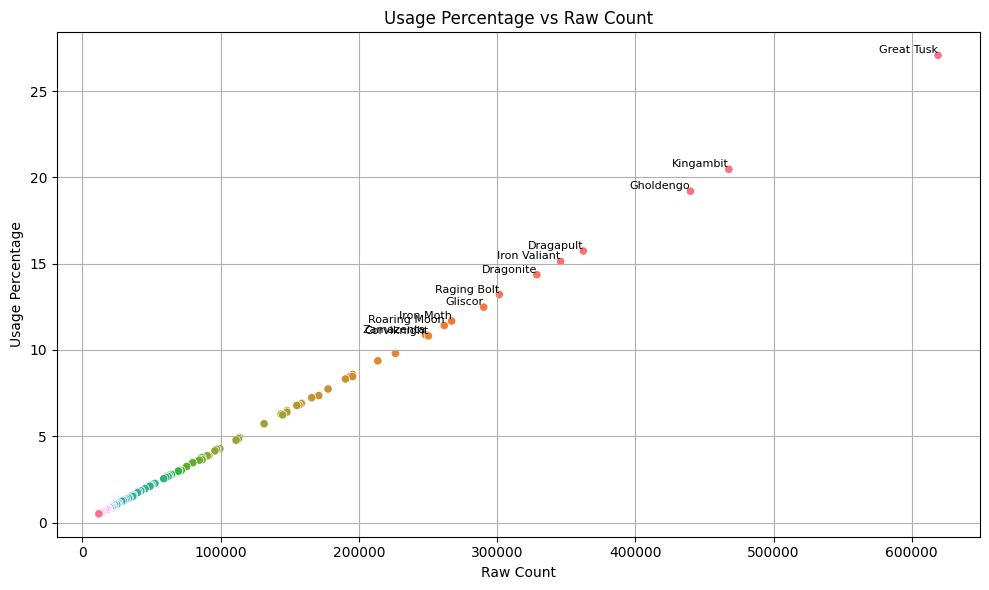

In [325]:
def plot_usage_vs_raw(df, usage_col="Usage %", raw_col="Raw count", label_threshold=10):
    """
    Plots a scatter plot comparing Usage Percentage to Raw Count.

    Parameters:
    - df: DataFrame containing usage data
    - usage_col: name of the column representing usage percentage
    - raw_col: name of the column representing raw count
    - label_threshold: usage % threshold above which Pokémon names will be annotated

    Returns:
    - Displays a scatter plot using matplotlib and seaborn
    """

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=raw_col, y=usage_col, hue="Pokemon", legend=False)

    # Label high-usage Pokémon
    for _, row in df.iterrows():
        if row[usage_col] > label_threshold:
            plt.text(row[raw_col], row[usage_col], row["Pokemon"],
                     fontsize=8, ha='right', va='bottom')

    plt.title("Usage Percentage vs Raw Count")
    plt.xlabel("Raw Count")
    plt.ylabel("Usage Percentage")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_usage_vs_raw(df_merged)

Strong positive linear relationship between Usage Percentage and Raw Count. This was heavily suspected when gathering the data but important to see the assumption realized. As we don't want variables with near-perfect correlation in our MVI to avoid over-weighting, we will be dropping Raw Count from this point forward.

It's interesting to see outliers like Great Tusk and Kingambit at the far right, this confirms that they are high-usage, metagame staples.

## Usage Percentage vs Lead Percentage

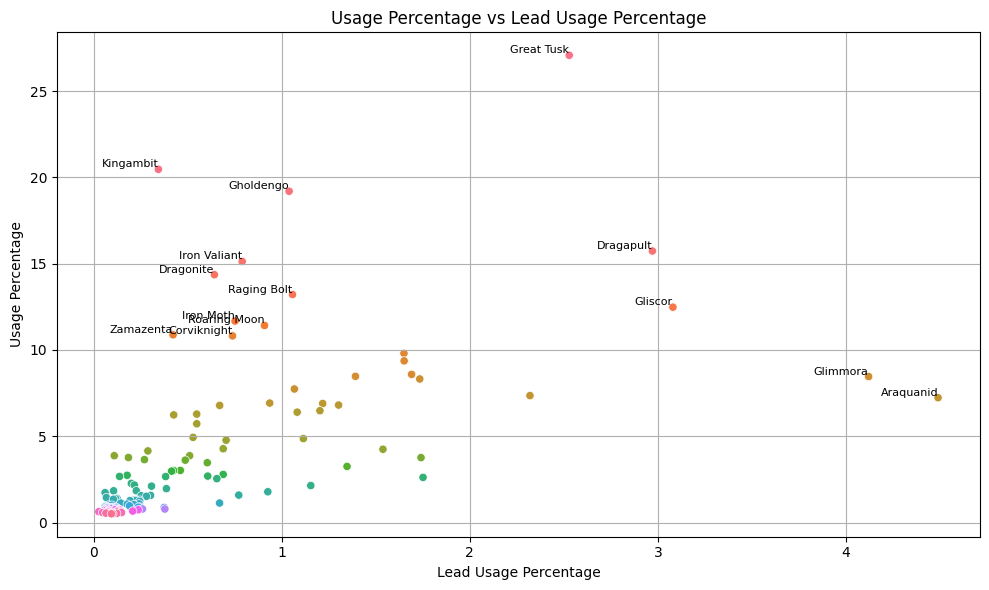

In [326]:
def plot_usage_vs_lead(df, usage_col="Usage %", lead_col="Lead Usage %", usage_threshold=10, lead_threshold=2.5):
    """
    Plots a scatter plot comparing Usage Percentage to Lead Usage Percentage.

    Parameters:
    - df: DataFrame containing usage and lead data
    - usage_col: name of the column representing usage percentage
    - lead_col: name of the column representing lead usage percentage
    - usage_threshold: usage % threshold for labeling Pokémon
    - lead_threshold: lead % threshold for additional labeling

    Returns:
    - Displays a scatter plot using matplotlib and seaborn
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=lead_col, y=usage_col, hue="Pokemon", legend=False)

    for _, row in df.iterrows():
        if row[usage_col] > usage_threshold or row[lead_col] > lead_threshold:
            plt.text(row[lead_col], row[usage_col], row["Pokemon"],
                     fontsize=8, ha='right', va='bottom')

    plt.title("Usage Percentage vs Lead Usage Percentage")
    plt.xlabel("Lead Usage Percentage")
    plt.ylabel("Usage Percentage")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_usage_vs_lead(df_merged)

Great Tusk, Gliscor, and Dragapult are prominent in both general usage and lead roles. These Pokémon are likely seen as consistent openers—perhaps due to strong utility, speed, or early momentum potential.

Kingambit, Gholdengo, and Iron Valiant are heavily used but rarely lead. These are likely Pokémon that serve as win conditions or mid-to-late-game threats, not designed for early scouting or hazards.

Glimmora and Araquanid appear far to the right, indicating strong niche use as leads. These might be suicide hazard setters, fast taunters, or disruptors. Their general viability is limited, but their lead value is high.

The bulk of Pokémon appear in the bottom-left. These are fringe picks, rarely used and almost never chosen to lead.